In [1]:
from treasury_ml_utils.snowflake_utils import SnowflakeConnector

snowflake_client = SnowflakeConnector("joshua.choy@transferwise.com")

 pip install snowflake-connector-python[secure-local-storage]


Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://transferwise.okta-emea.com/app/snowflake/exk4istpb5gZUyV8u0i7/sso/saml?SAMLRequest=nZJbc9owEIX%2Fikd9tmUbAkQDZLg0E1JIGDCZljdhL6BgS65WxsCvr8ylkz4kD33zyGf3O7tn2w%2BHLHX2oFEo2SGB5xMHZKwSITcdsoge3RZx0HCZ8FRJ6JAjIHnotpFnac56hdnKGfwuAI1jG0lk1Y8OKbRkiqNAJnkGyEzM5r3JmIWezzgiaGNx5FqSoLCsrTE5o7QsS6%2BseUpvaOj7PvXvqVVVkm%2FkAyL%2FmpFrZVSs0lvJwc70CSKgfr1CWIUlTK%2BFfSEvK%2FiKsrqIkD1F0dSdvs4j4vRu0w2UxCIDPQe9FzEsZuOLAbQOZlHYrIctDwo3Bmk0T93AQ6nKdcp3EKssL4xt7NkvuoaEpmoj7LpGww7JdyJ5b%2FRXk1m0XI5Hk9fTj%2F6aD5bbnWjOnpr%2Bce%2Ff%2F9T89P58en75%2Fismztst3LAKd4RYwEhWkRr75Id3bhC4YRAFAQsarF7zamFjSZyhjVRIbs6VN9%2FWqcQ16FIgeGpnuAsZ8LNNnuf07wQUDru6QJOv7jbLxfGtVfiiSREVrbIjl%2FNhZyu6%2Bx9LadOPDa7H%2BGLzGQ2nKhXx0XlUOuPm8%2FgCLzi%2FiMRdn6UMMi7SXpJoQLQxpqkqBxq4sTdvdA

 pip install snowflake-connector-python[secure-local-storage]


9.37.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [3]:
df = snowflake_client.fetch(f"""
    SELECT *, ((BID_OUTRIGHT+OFFER_OUTRIGHT)/2) as mid
    FROM RPT_TREASURY.INT_ASSET_PRICING__FX_QUOTE_SNAPSHOT_HOURLY
    WHERE CCY_PAIR IN ('EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 
                            'NZDUSD','USDCAD', 'USDCNH', 'USDSGD',
                            'USDMYR', 'USDIDR', 'USDINR', 
                            'USDPHP', 'USDTWD', 'USDCHF', 'USDTHB',
                            'USDKRW')
    AND TENOR_CODE = 'SP'
    AND INSTRUMENT_TYPE = 'FXSpot'
    AND PROVIDER = 'BLOOMBERG'
    AND TIMESTAMP BETWEEN '2025-06-01 00:00:00' AND '2025-11-20 23:59:59'  
""")
ccy_df = df.pivot(index='timestamp', columns='ccy_pair', values='mid')
ccy_df.head()

ccy_pair,AUDUSD,EURUSD,GBPUSD,NZDUSD,USDCAD,USDCHF,USDCNH,USDIDR,USDINR,USDJPY,USDKRW,USDMYR,USDPHP,USDSGD,USDTHB,USDTWD
timestamp,,,,,,,,,,,,,,,,
2025-06-01 00:00:00,0.64315,1.13475,1.3459,0.59585,1.374,0.82255,7.2051,16290.0,85.58125,144.025,1382.6,4.25675,55.7725,1.291,32.83,29.9145
2025-06-01 01:00:00,0.64315,1.13475,1.3459,0.59585,1.374,0.82255,7.2051,16290.0,85.58125,144.025,1382.6,4.25675,55.7725,1.291,32.83,29.9145
2025-06-01 02:00:00,0.64315,1.13475,1.3459,0.59585,1.374,0.82255,7.2051,16290.0,85.58125,144.025,1382.6,4.25675,55.7725,1.291,32.83,29.9145
2025-06-01 03:00:00,0.64315,1.13475,1.3459,0.59585,1.374,0.82255,7.2051,16290.0,85.58125,144.025,1382.6,4.25675,55.7725,1.291,32.83,29.9145
2025-06-01 04:00:00,0.64315,1.13475,1.3459,0.59585,1.374,0.82255,7.2051,16290.0,85.58125,144.025,1382.6,4.25675,55.7725,1.291,32.83,29.9145


In [4]:
ccy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4152 entries, 2025-06-01 00:00:00 to 2025-11-20 23:00:00
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AUDUSD  4152 non-null   float64
 1   EURUSD  4152 non-null   float64
 2   GBPUSD  4152 non-null   float64
 3   NZDUSD  4152 non-null   float64
 4   USDCAD  4152 non-null   float64
 5   USDCHF  4152 non-null   float64
 6   USDCNH  4152 non-null   float64
 7   USDIDR  4152 non-null   float64
 8   USDINR  4152 non-null   float64
 9   USDJPY  4152 non-null   float64
 10  USDKRW  4152 non-null   float64
 11  USDMYR  4152 non-null   float64
 12  USDPHP  4152 non-null   float64
 13  USDSGD  4152 non-null   float64
 14  USDTHB  4152 non-null   float64
 15  USDTWD  4152 non-null   float64
dtypes: float64(16)
memory usage: 551.4 KB


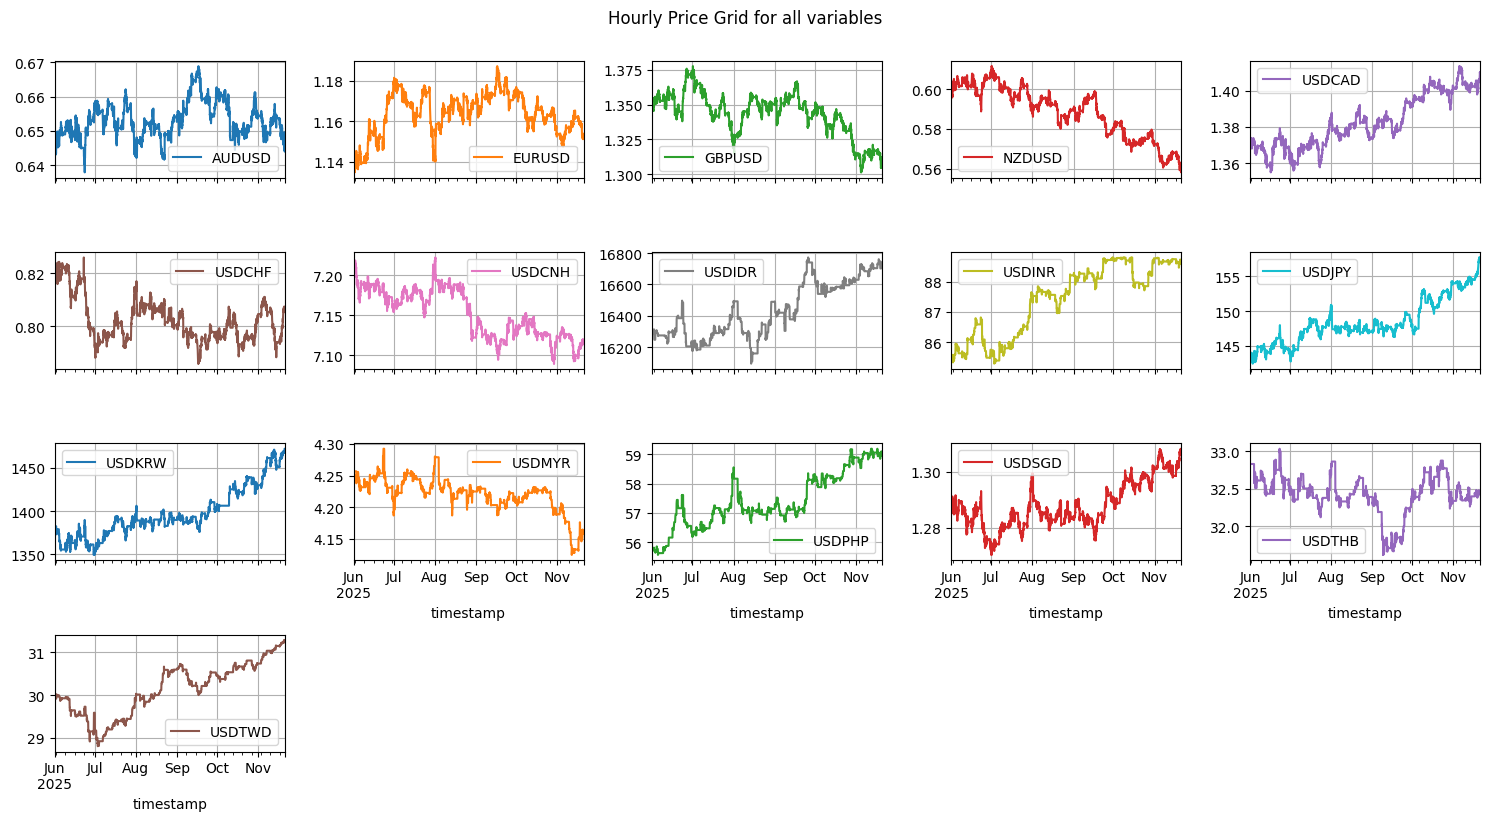

In [5]:
ccy_df.plot(subplots = True, layout = (6,5), figsize = (15,12), title = 'Hourly Price Grid for all variables', grid = True, sharex = True)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [6]:
# compute log returns

log_returns = np.log(ccy_df / ccy_df.shift(1))
log_returns = log_returns.dropna()
log_returns.describe()

ccy_pair,AUDUSD,EURUSD,GBPUSD,NZDUSD,USDCAD,USDCHF,USDCNH,USDIDR,USDINR,USDJPY,USDKRW,USDMYR,USDPHP,USDSGD,USDTHB,USDTWD
count,4.151000e+03,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000,4151.000000
mean,6.172519e-07,0.000004,-0.000007,-0.000015,0.000006,-0.000005,-0.000003,0.000006,0.000009,0.000021,0.000015,-0.000006,0.000014,0.000003,-0.000003,0.000011
std,9.042141e-04,0.000733,0.000737,0.000948,0.000489,0.000807,0.000243,0.000488,0.000371,0.000907,0.000900,0.000453,0.000614,0.000435,0.000712,0.000566
min,-7.612786e-03,-0.005130,-0.009467,-0.009640,-0.006233,-0.013073,-0.003377,-0.006542,-0.007332,-0.012569,-0.011971,-0.008194,-0.010995,-0.007302,-0.012170,-0.011336
25%,-3.044835e-04,-0.000237,-0.000224,-0.000337,-0.000145,-0.000250,-0.000077,0.000000,0.000000,-0.000269,0.000000,0.000000,0.000000,-0.000155,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.085349e-04,0.000255,0.000223,0.000337,0.000179,0.000251,0.000077,0.000000,0.000000,0.000338,0.000017,0.000000,0.000000,0.000155,0.000000,0.000000
max,1.029461e-02,0.012288,0.009605,0.009932,0.004451,0.009732,0.001532,0.008307,0.005592,0.013338,0.010187,0.005217,0.007983,0.002817,0.009208,0.012071


# PCA

In [7]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

macro_rets = log_returns[['GBPUSD' ,'EURUSD', 'USDJPY',
                          'AUDUSD', 'NZDUSD', 'USDCAD', 
                          'USDCHF']]


# scaling data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(macro_rets.dropna())
pca = PCA(n_components=4).fit(scaled_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.67281231 0.12140448 0.05972122 0.05549991]
Cumulative explained variance: 0.9094379240718675


               PC1       PC2       PC3       PC4
ccy_pair                                        
GBPUSD    0.392857 -0.073430  0.098319  0.526407
EURUSD    0.411647 -0.220222  0.270101  0.197995
USDJPY   -0.337017  0.487147  0.688077  0.380231
AUDUSD    0.380647  0.485036 -0.225955  0.118230
NZDUSD    0.397218  0.359335 -0.289942  0.169094
USDCAD   -0.359544 -0.351226 -0.383096  0.702542
USDCHF   -0.361501  0.470166 -0.402547  0.054602


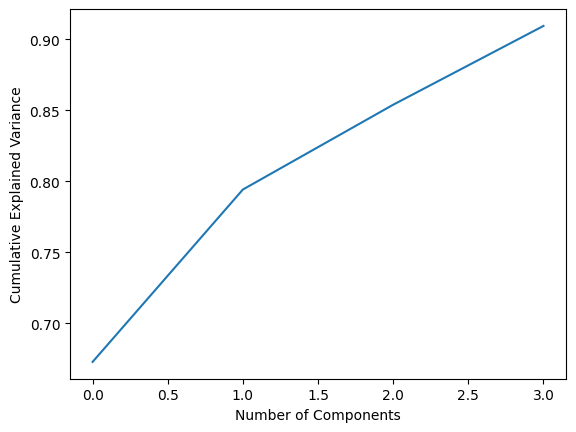

In [8]:
# check loadings contribution

loadings = pd.DataFrame(
    pca.components_.T,
    index=macro_rets.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components)]
)
print(loadings)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# Regression

In [9]:
pca_factors = pd.DataFrame(pca.transform(scaled_data), 
                           index=macro_rets.dropna().index, # Use the index from the data fed into PCA
                           columns=[f"PC{i+1}" for i in range(pca.n_components)])

pca_factors.head()

,PC1,PC2,PC3,PC4
timestamp,,,,
2025-06-01 01:00:00,0.018083,0.001726,-0.018915,-0.010958
2025-06-01 02:00:00,0.018083,0.001726,-0.018915,-0.010958
2025-06-01 03:00:00,0.018083,0.001726,-0.018915,-0.010958
2025-06-01 04:00:00,0.018083,0.001726,-0.018915,-0.010958
2025-06-01 05:00:00,0.018083,0.001726,-0.018915,-0.010958


In [10]:
log_returns.keys()

Index(['AUDUSD', 'EURUSD', 'GBPUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDCNH',
       'USDIDR', 'USDINR', 'USDJPY', 'USDKRW', 'USDMYR', 'USDPHP', 'USDSGD',
       'USDTHB', 'USDTWD'],
      dtype='object', name='ccy_pair')

In [11]:
fx_returns = log_returns[['USDCNH', 'USDSGD', 'USDTHB',
                          'USDPHP', 'USDIDR', 'USDINR',
                          'USDKRW', 'USDTWD']]
fx_returns.head()

ccy_pair,USDCNH,USDSGD,USDTHB,USDPHP,USDIDR,USDINR,USDKRW,USDTWD
timestamp,,,,,,,,
2025-06-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# rolling window approach

window_pca = 30*24    # 3 month PCA window
window_reg = 30*24    # 60-day regression window
n_components = 4

pca_betas = []

for end_idx in range(window_pca + window_reg, len(macro_rets)):
    start_idx = end_idx - window_pca
    pca = PCA(n_components=n_components)
    scaled_data = scaler.fit_transform(macro_rets.iloc[start_idx:end_idx])
    pca.fit(scaled_data)
    
    pc_scores = pd.DataFrame(
        pca.transform(scaled_data),
        index=macro_rets.iloc[start_idx:end_idx].index,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    
    # now regress FX on these PCs for the most recent 60 days
    fx_window = fx_returns.iloc[end_idx-window_reg:end_idx]
    
    for ccy in fx_window.columns:
        model = sm.OLS(fx_window[ccy], sm.add_constant(pc_scores.iloc[-window_reg:], )).fit(cov_type="HC3")
        pca_betas.append({
            'date': fx_window.index[-1],
            'ccy': ccy,
            **{f'PC{i+1}': model.params[i+1] for i in range(n_components)},
            'R2': model.rsquared
        })

In [13]:
pca_beta_df = pd.DataFrame(pca_betas)
pca_beta_df.iloc[-15:]

,date,ccy,PC1,PC2,PC3,PC4,R2
21673,2025-11-20 21:00:00,USDSGD,0.000155,-0.000034,-0.000035,0.000030,0.733400
21674,2025-11-20 21:00:00,USDTHB,0.000050,0.000013,-0.000077,-0.000005,0.043211
21675,2025-11-20 21:00:00,USDPHP,0.000028,0.000005,-0.000051,0.000031,0.020559
21676,2025-11-20 21:00:00,USDIDR,0.000005,0.000006,-0.000020,-0.000015,0.003116
21677,2025-11-20 21:00:00,USDINR,0.000010,-0.000004,-0.000038,0.000031,0.025640
21678,2025-11-20 21:00:00,USDKRW,0.000202,0.000030,-0.000116,0.000015,0.208975
21679,2025-11-20 21:00:00,USDTWD,0.000006,0.000003,-0.000014,0.000012,0.003116
21680,2025-11-20 22:00:00,USDCNH,0.000061,-0.000002,-0.000014,0.000025,0.364796
21681,2025-11-20 22:00:00,USDSGD,0.000155,-0.000034,-0.000035,0.000029,0.733389
21682,2025-11-20 22:00:00,USDTHB,0.000050,0.000013,-0.000077,-0.000004,0.043213


In [14]:
loadings = pd.DataFrame(pca.components_.T, index=macro_rets.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

In [15]:
scaler = StandardScaler().fit(macro_rets.dropna())
scaler

StandardScaler()

In [16]:
# --- Step 1: pick the latest snapshot per currency ---
latest_date = pca_beta_df['date'].max()
snapshot = (
    pca_beta_df[pca_beta_df['date'] == latest_date]
    .set_index('ccy')
    [['PC1','PC2','PC3','PC4','R2']]
)

# --- Step 2: align with loadings ---
pc_cols = [c for c in snapshot.columns if c.startswith('PC')]
W = loadings[pc_cols]   # rows = original variables, cols = PCs

# --- Step 3: map FX→PC betas to standardized original drivers ---
beta_stdX = snapshot[pc_cols].dot(W.T)

# --- Step 4: undo standardization (back to real-world units) ---
driver_scales = pd.Series(scaler.scale_, index=W.index)
fx_to_orig = beta_stdX.div(driver_scales, axis=1)

# --- Step 5: convert to bps per 1% driver move ---
fx_to_orig_bps_per_1pct = fx_to_orig * 100

# --- Step 6: add metadata and pretty print ---
fx_to_orig_bps_per_1pct['R2'] = snapshot['R2']
fx_to_orig_bps_per_1pct['Date'] = latest_date
fx_to_orig_bps_per_1pct = fx_to_orig_bps_per_1pct.sort_values('R2', ascending = False)
fx_to_orig_bps_per_1pct.round(5)

ccy_pair,GBPUSD,EURUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,R2,Date
ccy,,,,,,,,,
USDSGD,-6.83434,-8.94701,10.18718,-5.60880,-7.03096,6.96021,7.48396,0.73339,2025-11-20 22:00:00
USDCNH,-2.75572,-2.96896,3.74689,-3.25656,-3.75333,1.41210,2.02028,0.36480,2025-11-20 22:00:00
USDKRW,-2.32378,-7.05426,13.69986,-11.85934,-11.69419,22.02752,5.25253,0.20900,2025-11-20 22:00:00
USDTHB,3.21938,-0.13213,6.53395,-3.62215,-3.19987,10.31459,0.25497,0.04321,2025-11-20 22:00:00
USDINR,1.70184,0.79974,4.41598,-1.63954,-2.00670,-1.81221,-0.99837,0.02561,2025-11-20 22:00:00
USDPHP,1.80427,0.46414,5.42504,-3.02994,-3.22962,0.95060,-0.85034,0.02052,2025-11-20 22:00:00
USDTWD,0.56974,0.33002,1.45215,-0.92634,-0.98898,-0.30984,-0.48548,0.00308,2025-11-20 22:00:00
USDIDR,1.51809,0.37320,0.90047,-0.34758,0.00167,4.30527,-0.05723,0.00308,2025-11-20 22:00:00


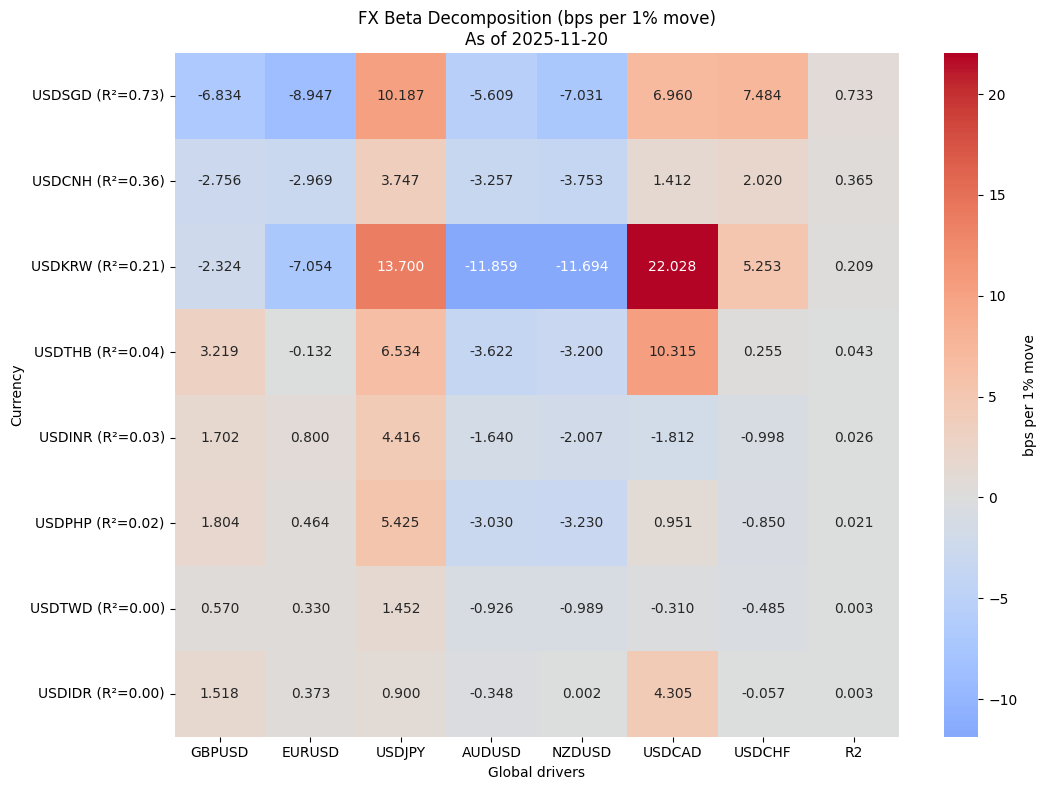

In [17]:
# rename columns
col_map = {
    'EURUSD': 'EURUSD',
    'GBPUSD': 'GBPUSD',
    'USDJPY': 'USDJPY',
    'AUDUSD': 'AUDUSD',
    'NZDUSD': 'NZDUSD',
    'USDCAD': 'USDCAD',
    'USDCHF': 'USDCHF',
}
df = fx_to_orig_bps_per_1pct.rename(columns=col_map)

# rename currency labels
row_map = {
    'USDSGD Curncy': 'USDSGD',
    'PPN+1M Curncy': 'USDPHP',
    'KWN+1M Curncy': 'USDKRW',
    'IRN+1M Curncy': 'USDINR',
    'IHN+1M Curncy': 'USDIDR',
    'USDTHB Curncy': 'USDTHB',
    'USDCNH Curncy': 'USDCNH',
    'MRN+1M Curncy': 'USDMYR'
}
df = df.rename(index=row_map)

y_labels = [
    f"{ccy} (R²={r2:.2f})"
    for ccy, r2 in zip(df.index, df['R2'])
]

# heatmap
heatmap_df = df.iloc[:, :8]
plt.figure(figsize=(11, 8))

ax = sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'bps per 1% move'}
)

ax.set_yticklabels(y_labels, rotation=0)  # ✅ replace row names with R² included
ax.set_xlabel("Global drivers")
ax.set_ylabel("Currency")

title_date = df['Date'].iloc[0]
ax.set_title(f"FX Beta Decomposition (bps per 1% move)\nAs of {title_date:%Y-%m-%d}")

plt.tight_layout()
plt.show()